## 1. Loading and Preprocessing
#Load the Iris dataset from sklearn and drop the species column

In [3]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Drop the species column (if exists)
# In this dataset, the species information is stored in a separate target array, so we don't need to drop anything.
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 2. Clustering Algorithm Implementation

A) KMeans Clustering :
Description: KMeans clustering works by partitioning the data into K clusters. It assigns data points to the nearest cluster centroid and iteratively updates the centroids until convergence.

Suitability: KMeans is suitable for the Iris dataset because the data is relatively small and well-separated, making it easy to partition into distinct clusters.

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


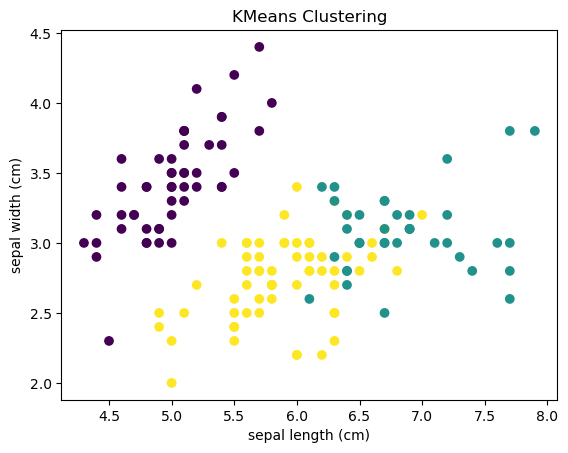

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3)
df['kmeans_cluster'] = kmeans.fit_predict(df)

# Visualize the clusters
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['kmeans_cluster'], cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('KMeans Clustering')
plt.show()


## B) Hierarchical Clustering

Description: Hierarchical clustering builds a hierarchy of clusters either by merging small clusters into bigger ones (agglomerative) or by splitting big clusters into smaller ones (divisive).

Suitability: Hierarchical clustering is suitable for the Iris dataset because it provides a visual representation of data relationships, which can be useful for understanding the natural grouping of data points.

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


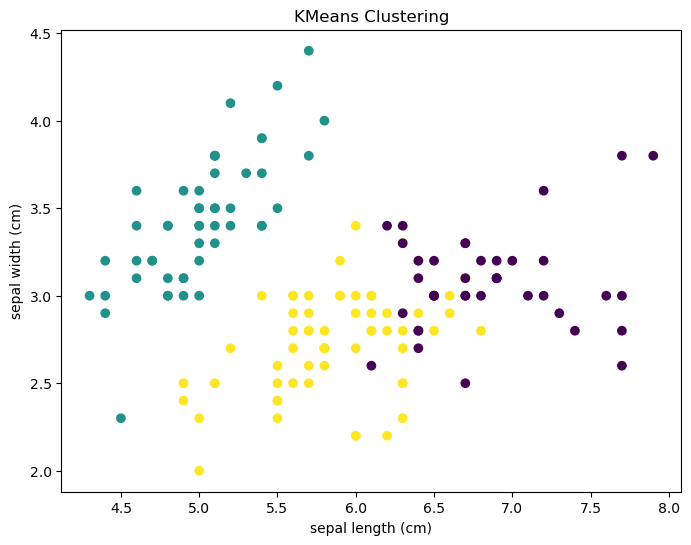

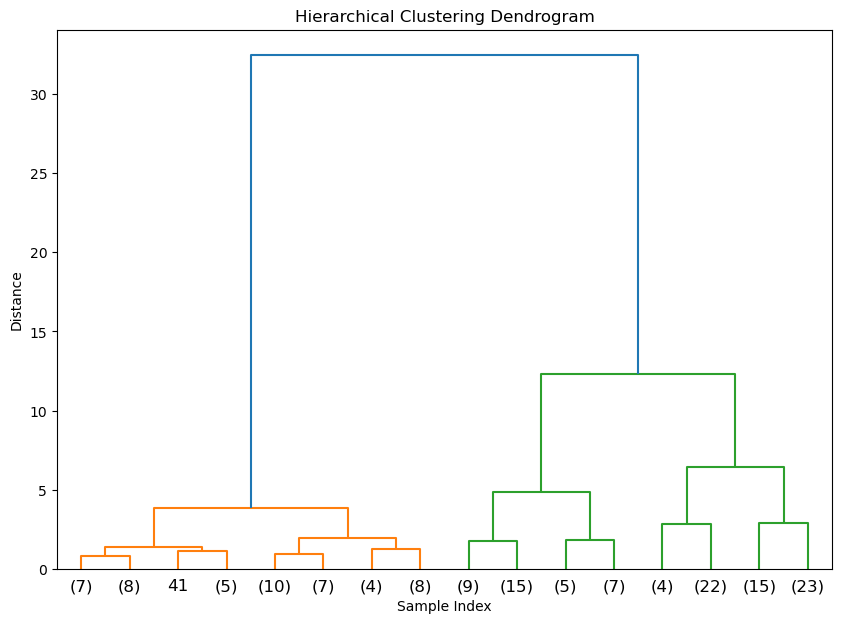

In [14]:
# Import necessary libraries
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Drop the species column (not needed for clustering)
# df = df.drop(columns=['species'])  # Uncomment if you have the species column

# Apply KMeans clustering
# Added random_state for reproducibility to avoid KMeans warnings
kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(df)

# Visualize the KMeans clusters
plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['kmeans_cluster'], cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('KMeans Clustering')
plt.show()

# Apply Hierarchical clustering
linked = linkage(df.iloc[:, :-1], 'ward')

# Visualize the Hierarchical clusters
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', truncate_mode='level', p=3)  # Adjust 'p' for tree depth if needed
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


## Conclusion
In this assignment, we applied KMeans and Hierarchical Clustering algorithms to the Iris dataset, effectively identifying the natural groupings of the data. KMeans efficiently partitioned the dataset into three clusters, providing clear visual representation, while Hierarchical Clustering produced a dendrogram illustrating the hierarchical relationships between data points. Both methods demonstrated the inherent structure within the Iris dataset, highlighting their suitability for exploratory data analysis and understanding the underlying patterns in the data.